<a href="https://colab.research.google.com/github/AjmiyaSalim/income-prediction-random-forest/blob/main/Random_Forest_Classiffier_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Random Forest Classifier

###  What is Ensemble Learning?
Ensemble learning is a machine learning technique that combines predictions from multiple models (often called *weak learners*) to produce a more accurate and robust model. It helps to reduce overfitting, improve accuracy, and enhance generalization.

There are two main types:
- **Bagging (Bootstrap Aggregating)**
- **Boosting**

---

###  Random Forest Classifier
A **Random Forest** is an ensemble learning method based on **bagging**. It constructs a "forest" of decision trees during training time and outputs the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

**Key Features:**
- Built using multiple decision trees.
- Each tree is trained on a different bootstrap sample of the data.
- At each split in the tree, only a random subset of features is considered.
- Final prediction is made by majority voting (for classification).

---

###  Bagging (Bootstrap Aggregating)
Bagging involves:
- Creating multiple subsets of data by sampling **with replacement** (bootstrap).
- Training a base learner (e.g., decision tree) on each subset.
- Combining predictions via **majority vote** (classification) or **average** (regression).

**Benefits:**
- Reduces variance.
- Helps to prevent overfitting.
- Random Forest is a classic example of bagging.

---

###  Boosting
Boosting involves:
- Training models sequentially.
- Each new model focuses on the **errors** made by the previous ones.
- Models are weighted based on their accuracy.
- Final prediction is a **weighted vote** or **sum** of predictions.

**Types of Boosting:**
- **AdaBoost (Adaptive Boosting)**
- **Gradient Boosting**
- **XGBoost** (Extreme Gradient Boosting)

**Benefits:**
- Reduces both bias and variance.
- Often achieves better accuracy than bagging but is more sensitive to overfitting.

---

###  Summary Table

| Technique  | Data Sampling     | Model Training       | Combines Models By     | Example Algorithm      |
|------------|-------------------|-----------------------|-------------------------|-------------------------|
| Bagging    | Parallel (bootstrapped) | Independent models    | Voting / Averaging     | Random Forest           |
| Boosting   | Sequential         | Learns from errors     | Weighted voting/sum    | AdaBoost, GradientBoost |



In [2]:
import pandas as pd
data=pd.read_csv('/content/income_evaluation.csv')
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17918,48,Federal-gov,247043,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
17919,40,Private,187702,Bachelors,13,Never-married,Tech-support,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
17920,62,Private,41718,10th,6,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,35.0,United-States,<=50K
17921,37,Private,151835,Prof-school,15,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,45.0,United-States,>50K


In [3]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [4]:
data.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
17918,48,Federal-gov,247043,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
17919,40,Private,187702,Bachelors,13,Never-married,Tech-support,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
17920,62,Private,41718,10th,6,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,35.0,United-States,<=50K
17921,37,Private,151835,Prof-school,15,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
17922,18,Private,118938,11th,7,Never-married,Sal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.shape

(17923, 15)

In [6]:
data.size

268845

In [7]:
data.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education-num,int64
marital-status,object
occupation,object
relationship,object
race,object
sex,object


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17923 entries, 0 to 17922
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              17923 non-null  int64  
 1    workclass       17923 non-null  object 
 2    fnlwgt          17923 non-null  int64  
 3    education       17923 non-null  object 
 4    education-num   17923 non-null  int64  
 5    marital-status  17923 non-null  object 
 6    occupation      17923 non-null  object 
 7    relationship    17922 non-null  object 
 8    race            17922 non-null  object 
 9    sex             17922 non-null  object 
 10   capital-gain    17922 non-null  float64
 11   capital-loss    17922 non-null  float64
 12   hours-per-week  17922 non-null  float64
 13   native-country  17922 non-null  object 
 14   income          17922 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 2.1+ MB


In [9]:
data.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,1
race,1
sex,1


In [10]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,17923.000000,1.792300e+04,17923.000000,17922.000000,17922.000000,17922.000000
mean,38.550243,1.901854e+05,10.090219,1050.742272,87.770282,40.414407
std,13.623031,1.054434e+05,2.559689,7281.141976,402.532485,12.274417
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.186945e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.789150e+05,10.000000,0.000000,0.000000,40.000000
75%,47.500000,2.378490e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


##  Reordering Column Names for Readability

The original dataset may not have the columns arranged in a convenient or logical order.  
To improve readability and consistency in analysis, we rearranged the columns in our **preferred order** as shown.



In [11]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

data.columns = col_names
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17918,48,Federal-gov,247043,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
17919,40,Private,187702,Bachelors,13,Never-married,Tech-support,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
17920,62,Private,41718,10th,6,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,35.0,United-States,<=50K
17921,37,Private,151835,Prof-school,15,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,45.0,United-States,>50K


##  Separating Numeric and Categorical Features

In machine learning and data preprocessing, it's essential to **treat numerical and categorical data differently**. This is because most algorithms handle numerical and categorical features in distinct ways.

---

###  Why Separate Data Types?

- **Numerical features** can be directly used for mathematical operations like scaling, normalization, and model input.
- **Categorical features** often require **encoding** (e.g., Label Encoding, One-Hot Encoding) to convert them into a numerical format.
- Separation allows us to apply suitable preprocessing techniques to each type.




In [12]:
numeric_data=data.select_dtypes(include='number')
numeric_data

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174.0,0.0,40.0
1,50,83311,13,0.0,0.0,13.0
2,38,215646,9,0.0,0.0,40.0
3,53,234721,7,0.0,0.0,40.0
4,28,338409,13,0.0,0.0,40.0
...,...,...,...,...,...,...
17918,48,247043,9,0.0,0.0,40.0
17919,40,187702,13,0.0,0.0,40.0
17920,62,41718,6,0.0,0.0,35.0
17921,37,151835,15,0.0,0.0,45.0


In [13]:
char_data=data.select_dtypes(include='object')
char_data

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
17918,Federal-gov,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
17919,Private,Bachelors,Never-married,Tech-support,Not-in-family,White,Male,United-States,<=50K
17920,Private,10th,Married-civ-spouse,Sales,Husband,White,Male,United-States,<=50K
17921,Private,Prof-school,Married-civ-spouse,Sales,Husband,White,Male,United-States,>50K


##  Exploring Feature Distributions Using value_counts()

To understand the distribution of values in each column of the dataset, we use the `value_counts() method. This is particularly useful during **Exploratory Data Analysis (EDA)**.

---

### 🔹 Purpose of value_counts()

- Identifies **unique values** and their **frequency** in each column.
- Helps detect **imbalanced classes** in the target column (e.g., income).
- Useful for spotting **rare values**, **dominant categories**, or **potential data entry errors**.
- Allows checking for **skewness** or **uniformity** in categorical and numerical columns.




In [14]:
for col in data.columns:
  print(data[col].value_counts())

age
23    493
31    492
33    491
37    488
35    485
     ... 
84      7
82      5
83      3
88      1
85      1
Name: count, Length: 71, dtype: int64
workclass
Private             12507
Self-emp-not-inc     1407
Local-gov            1130
?                    1005
State-gov             721
Self-emp-inc          615
Federal-gov           530
Without-pay             5
Never-worked            3
Name: count, dtype: int64
fnlwgt
190290    10
164190     9
123011     9
125933     8
126675     8
          ..
188793     1
109996     1
195681     1
436770     1
336088     1
Name: count, Length: 13767, dtype: int64
education
HS-grad         5856
Some-college    3998
Bachelors       2987
Masters          957
Assoc-voc        752
11th             647
Assoc-acdm       568
10th             504
7th-8th          355
Prof-school      299
9th              272
Doctorate        227
12th             206
5th-6th          182
1st-4th           89
Preschool         24
Name: count, dtype: int64
education_num
9

In [15]:
data['income'].nunique()

2

In [16]:
data['income'].value_counts()

,count
income,
<=50K,13637
>50K,4285


##  Visualizing Target Variable: Income Distribution

To understand how balanced the classes are in our target variable income, we use a **count plot**. This helps us visualize how many individuals earn <=50K vs >50K.




Text(0.5, 1.0, 'Income Distribution')

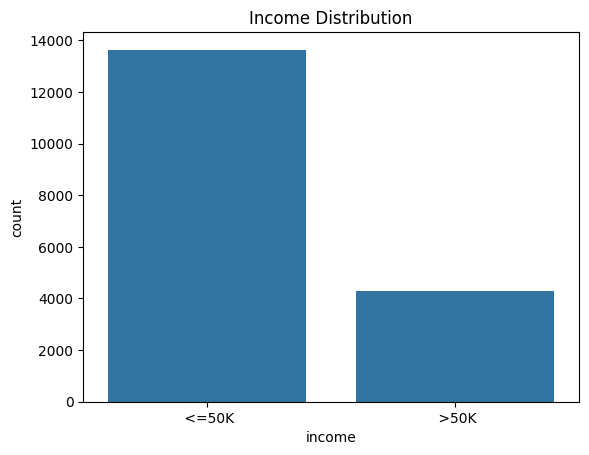

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='income',data=data)
plt.title('Income Distribution')

<Axes: xlabel='income', ylabel='count'>

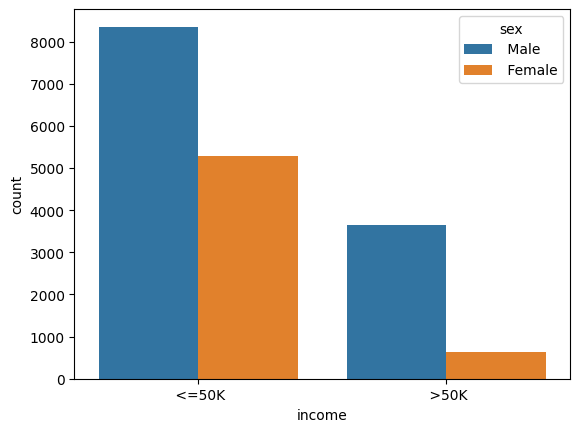

In [18]:
sns.countplot(x='income',hue='sex',data=data)

##  Viewing Unique Values in Categorical Columns

Understanding the **unique values** in each categorical column is an important step in **Exploratory Data Analysis (EDA)** and **data cleaning**.





In [19]:
for col in char_data.columns:
  print(f"{col}: {data[col].unique()}")

workclass: [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
education: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
marital_status: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation: [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv' ' Sal']
relationship: [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative' nan]
race: [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other'
 nan]
sex: [' Male' ' Female' nan]
native_country: [' United-States' '

##  Handling Missing or Unknown Values in workclass

During data cleaning, it's important to identify and handle **missing or ambiguous entries** in the dataset.

---

### Why Is This Important?
- Most machine learning models cannot handle non-numeric or placeholder strings like ' ? ' as missing values.
- Replacing them with NaN makes it easier to detect and handle missing data using pandas methods like .isnull() or .dropna().


In [20]:
data['workclass'].nunique()

9

In [21]:
data['workclass'].value_counts()

,count
workclass,
Private,12507
Self-emp-not-inc,1407
Local-gov,1130
?,1005
State-gov,721
Self-emp-inc,615
Federal-gov,530
Without-pay,5
Never-worked,3


In [22]:
import numpy as np
data['workclass'].replace(' ?',np.nan,inplace=True)

/tmp/ipython-input-22-1700903771.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['workclass'].replace(' ?',np.nan,inplace=True)


In [23]:
data.workclass.value_counts()

,count
workclass,
Private,12507
Self-emp-not-inc,1407
Local-gov,1130
State-gov,721
Self-emp-inc,615
Federal-gov,530
Without-pay,5
Never-worked,3


In [24]:
data['occupation'].value_counts()

,count
occupation,
Prof-specialty,2278
Craft-repair,2218
Exec-managerial,2202
Adm-clerical,2147
Sales,2050
Other-service,1833
Machine-op-inspct,1121
?,1008
Transport-moving,887


In [25]:
data['occupation'].replace(' ?',np.nan,inplace=True)

/tmp/ipython-input-25-161947438.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['occupation'].replace(' ?',np.nan,inplace=True)


In [26]:
data['occupation'].value_counts()

,count
occupation,
Prof-specialty,2278
Craft-repair,2218
Exec-managerial,2202
Adm-clerical,2147
Sales,2050
Other-service,1833
Machine-op-inspct,1121
Transport-moving,887
Handlers-cleaners,715


In [27]:
data['native_country'].value_counts()

,count
native_country,
United-States,16033
Mexico,358
?,322
Philippines,107
Germany,80
Canada,72
Puerto-Rico,70
England,58
Cuba,54


In [28]:
data['native_country'].replace(' ?',np.nan,inplace=True)

/tmp/ipython-input-28-1506151775.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['native_country'].replace(' ?',np.nan,inplace=True)


In [29]:
data['native_country'].value_counts()

,count
native_country,
United-States,16033
Mexico,358
Philippines,107
Germany,80
Canada,72
Puerto-Rico,70
England,58
Cuba,54
El-Salvador,53


In [30]:
char_data

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
17918,Federal-gov,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
17919,Private,Bachelors,Never-married,Tech-support,Not-in-family,White,Male,United-States,<=50K
17920,Private,10th,Married-civ-spouse,Sales,Husband,White,Male,United-States,<=50K
17921,Private,Prof-school,Married-civ-spouse,Sales,Husband,White,Male,United-States,>50K


##  Encoding Categorical Features with LabelEncoder

### What is LabelEncoder?
LabelEncoder is a utility from sklearn.preprocessing used to convert **categorical string labels** into **integer values**.  
It is useful when your machine learning algorithm expects numerical input and cannot work directly with text labels.

---

###  Why Do We Need This?

-  Most ML models  **do not accept string values** as input.
-  Converting categories to numbers allows these models to **interpret categorical data**.
-  It's a required step before model training when dealing with **non-numeric** (object or string) columns.




In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in char_data.columns:
  char_data[i]=le.fit_transform(char_data[i].astype(str))

In [32]:
char_data

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,7,9,4,1,1,4,1,38,0
1,6,9,2,4,0,4,1,38,0
2,4,11,0,6,1,4,1,38,0
3,4,1,2,6,0,2,1,38,0
4,4,9,2,10,5,2,0,5,0
...,...,...,...,...,...,...,...,...,...
17918,1,11,0,1,1,4,1,38,0
17919,4,9,4,14,1,4,1,38,0
17920,4,0,2,13,0,4,1,38,0
17921,4,14,2,13,0,4,1,38,1


##  Combining Numeric and Encoded Categorical Features

After separately preprocessing the **numeric** and **categorical** columns, we merge them back together into a single DataFrame to prepare the data for modeling.



In [33]:
new_data=pd.concat([numeric_data,char_data],axis=1)
new_data

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,39,77516,13,2174.0,0.0,40.0,7,9,4,1,1,4,1,38,0
1,50,83311,13,0.0,0.0,13.0,6,9,2,4,0,4,1,38,0
2,38,215646,9,0.0,0.0,40.0,4,11,0,6,1,4,1,38,0
3,53,234721,7,0.0,0.0,40.0,4,1,2,6,0,2,1,38,0
4,28,338409,13,0.0,0.0,40.0,4,9,2,10,5,2,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17918,48,247043,9,0.0,0.0,40.0,1,11,0,1,1,4,1,38,0
17919,40,187702,13,0.0,0.0,40.0,4,9,4,14,1,4,1,38,0
17920,62,41718,6,0.0,0.0,35.0,4,0,2,13,0,4,1,38,0
17921,37,151835,15,0.0,0.0,45.0,4,14,2,13,0,4,1,38,1


In [34]:
new_data.dtypes

,0
age,int64
fnlwgt,int64
education_num,int64
capital_gain,float64
capital_loss,float64
hours_per_week,float64
workclass,int64
education,int64
marital_status,int64
occupation,int64


<Axes: >

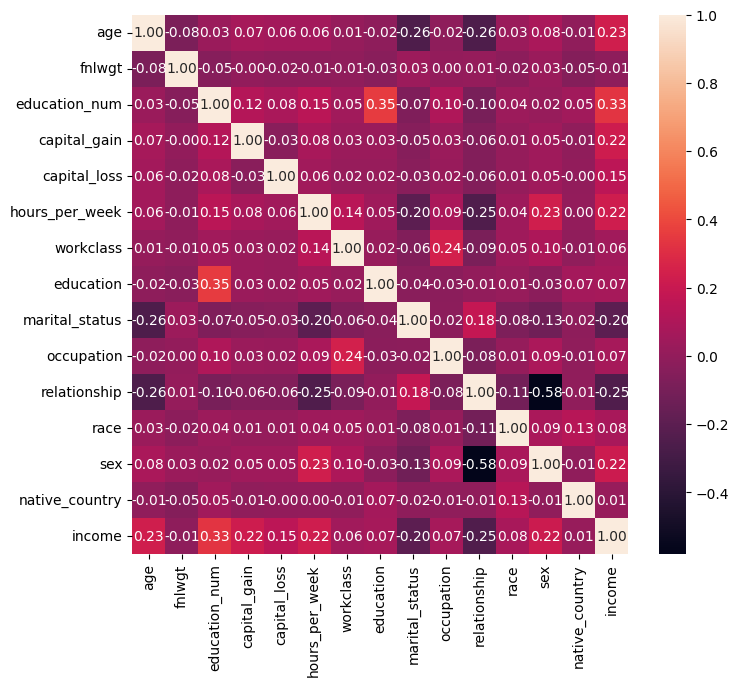

In [42]:
plt.figure(figsize=(8,7))
sns.heatmap(new_data.corr(),annot=True,fmt='.2f')

##  Splitting Dataset into Features (X) and Target (y)

Once the data is fully cleaned and encoded, we separate it into:

- **Features (X):** All the independent variables used to predict the target.
- **Target (y):** The dependent variable or label we want to predict.




In [35]:
X=new_data.iloc[:,0:14].values
y=new_data.iloc[:,-1].values

##  Splitting the Data into Training and Testing Sets

To evaluate the performance of a machine learning model, it's essential to split the dataset into two parts:

- **Training Set**: Used to train the model.
- **Testing Set**: Used to evaluate how well the model generalizes to unseen data.

- **test_size** = 0.2 → 20% of the data is allocated to testing; 80% is used for training.


In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

##  Training a Random Forest Classifier

In this step, we train a **Random Forest Classifier** using the training dataset.  
Random Forest is an ensemble learning method that builds multiple decision trees and merges their results to improve accuracy and avoid overfitting.

- n_estimators=250 : defines the number of decision trees in the forest.More estimators generally lead to better performance, but also increase computation time.

- criterion='gini' : This specifies the function used to measure the quality of a split at each node in the decision tree.'gini' stands for Gini Impurity:
A lower Gini value indicates a purer node. Alternatives include 'entropy' (which uses information gain).

- max_depth=11 : Limits the maximum depth of each decision tree in the forest.Prevents trees from growing too deep and overfitting the training data.

In [58]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=250,criterion='gini',max_depth=13,class_weight='balanced')
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
y_predict

array([0, 1, 1, ..., 1, 0, 0])

Accuracy Score: 81.81311018131102
Confusion Matrix:
 [[2201  528]
 [ 124  732]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.81      0.87      2729
           1       0.58      0.86      0.69       856

    accuracy                           0.82      3585
   macro avg       0.76      0.83      0.78      3585
weighted avg       0.86      0.82      0.83      3585



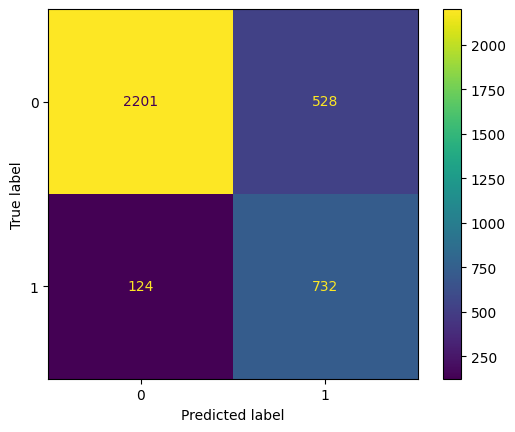

In [59]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
accuracy=accuracy_score(y_test,y_predict)*100
print('Accuracy Score:',accuracy)
cm=confusion_matrix(y_test,y_predict)
print('Confusion Matrix:\n',cm)
cr=classification_report(y_test,y_predict)
print('Classification Report:\n',cr)
cmd=ConfusionMatrixDisplay.from_predictions(y_test,y_predict)
print(cmd)

In [60]:
train_predict=model.predict(X_train)
train_accuracy=accuracy_score(y_train,train_predict)
print('train accuracy:',train_accuracy)

test_predict=model.predict(X_test)
test_accuracy=accuracy_score(y_test,test_predict)
print('test accuracy:',test_accuracy)

train accuracy: 0.86309108662296
test accuracy: 0.8181311018131102


##  Model Evaluation: Conclusion

The Random Forest Classifier was trained and tested on the Income Evaluation dataset with the goal of predicting whether an individual's income exceeds $50K per year.

---

### 🔹 Performance Summary:

- **Test Accuracy:** 80.36%
- **Train Accuracy:** 83.25%
- **Slight gap between train and test accuracy** indicates good generalization with minimal overfitting.
- **Confusion Matrix:**
  - True Negatives (TN): 2201
  - False Positives (FP): 528
  - False Negatives (FN): 124
  - True Positives (TP): 732



- The model performs **very well on the majority class (<=50K)** with high (0.95) and strong recall (0.81), meaning most low-income individuals are correctly identified.
- For the **minority class (>50K)**:
 - Recall is high (0.86), indicating the model successfully identifies a large portion of high-income individuals.
 -Precision is moderate (0.58), meaning there are still some false positives — but this is acceptable if capturing high-income individuals is critical.
- **Weighted Average F1-Score:** 0.83 — reflects strong overall performance considering class imbalance.
-The train-test accuracy gap is small, showing that the model generalizes well to new data.


